# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from matplotlib.pyplot import subplots
from scipy.stats import linregress
import numpy as np
from scipy import stats



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_merged=pd.merge(study_results,mouse_metadata,how="left", on="Mouse ID")

# Display the data table for preview
mouse_study_merged.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
total_mice = len(mouse_study_merged["Mouse ID"].unique())
total_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ID = mouse_study_merged.loc[mouse_study_merged.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = mouse_study_merged.loc[mouse_study_merged["Mouse ID"] == "g989"]
duplicate_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice=mouse_study_merged[mouse_study_merged['Mouse ID'].isin(duplicate_mice_ID)==False]
clean_mice.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
total_clean_mice = len(clean_mice["Mouse ID"].unique())
total_clean_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_mice = clean_mice['Tumor Volume (mm3)'].groupby(clean_mice['Drug Regimen']).mean()
median_mice = clean_mice['Tumor Volume (mm3)'].groupby(clean_mice['Drug Regimen']).median()
variance_mice = clean_mice['Tumor Volume (mm3)'].groupby(clean_mice['Drug Regimen']).var()
std_mice = clean_mice['Tumor Volume (mm3)'].groupby(clean_mice['Drug Regimen']).std()
sem_mice = clean_mice['Tumor Volume (mm3)'].groupby(clean_mice['Drug Regimen']).sem()

# Assemble the resulting series into a single summary DataFrame.
summary_mice=pd.DataFrame({"Mean Tumor Volume":mean_mice,
                           "Median Tumor Volume":median_mice,
                           "Tumor Volume Variance":variance_mice,
                           "Tumor Volume Std. Dev.":std_mice,
                           "Tumor Volume Std. Err.":sem_mice,
                           })
summary_mice

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary__mice_agg =  clean_mice.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary__mice_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice per Drug Regimen')

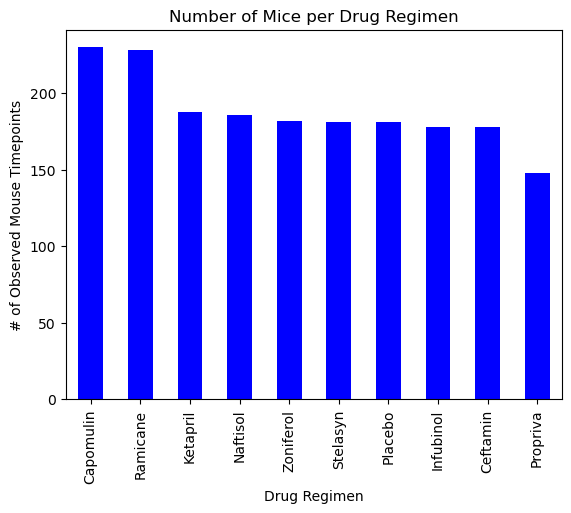

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = clean_mice["Drug Regimen"].value_counts()

plot_Pandas=mice_count.plot.bar(color='b')  
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Number of Mice per Drug Regimen")

Text(0.5, 1.0, 'Number of Mice per Drug Regimen')

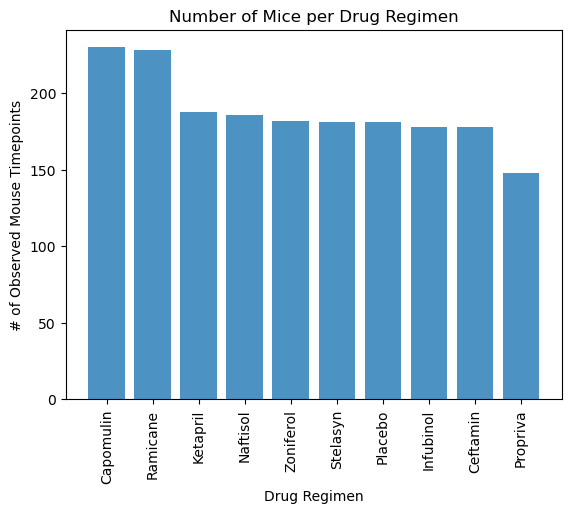

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(mice_count.index.values,mice_count.values,alpha=0.8, align='center')
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Number of Mice per Drug Regimen")

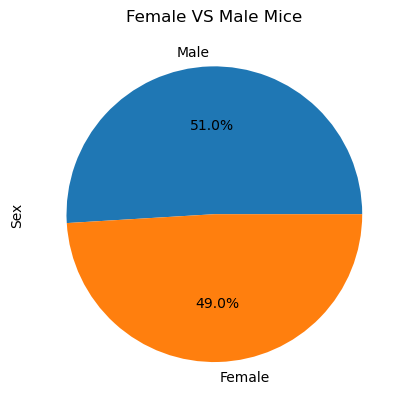

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_mice["Sex"].value_counts()
gender_data.plot.pie(autopct= "%1.1f%%")
plt.title("Female VS Male Mice")
plt.ylabel('Sex')
plt.show()

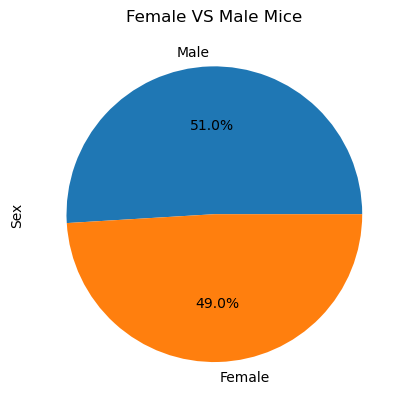

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
Female_df = clean_mice.loc[clean_mice["Sex"] == "Female",:]
Male_df = clean_mice.loc[clean_mice["Sex"] == "Male",:]
sizes = sizes = [Female_df, Male_df]
plot = gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Female VS Male Mice')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin.


max_tumor = clean_mice.groupby('Mouse ID')['Timepoint'].max()
max_tumor=max_tumor.reset_index()


merge_df  = max_tumor.merge(clean_mice , on=["Mouse ID","Timepoint"],how="left")



In [14]:
# Put treatments into a list for for loop (and later for plot labels)

four_treatments=['Capomulin','Ramicane','Infubinol','Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list=[]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 

for x in four_treatments:

    treatment_df = merge_df.loc[merge_df["Drug Regimen"] == x,'Tumor Volume (mm3)']
    tumor_vol_list.append(treatment_df)
    quartiles =round(treatment_df.quantile([.25,.5,.75]),2)
    lowerq = round(quartiles[0.25],2)
    upperq = round(quartiles[0.75],2)
    iqr = round(upperq-lowerq,2)


    print(f"The lower quartile of "+ x +" tumors: "+str(lowerq))
    print(f"The upper quartile of "+ x + " tumors: "+str(upperq))
    print(f"The interquartile range of "+ x + " tumors: "+ str(iqr))
    print(f"The median of " + x + " tumors: "+ str(quartiles[0.5]) )
        
        # Determine outliers using upper and lower bounds
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)

    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 32.38
The upper quartile of Capomulin tumors: 40.16
The interquartile range of Capomulin tumors: 7.78
The median of Capomulin tumors: 38.13
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.
The lower quartile of Ramicane tumors: 31.56
The upper quartile of Ramicane tumors: 40.66
The interquartile range of Ramicane tumors: 9.1
The median of Ramicane tumors: 36.56
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
The lower quartile of Infubinol tumors: 54.05
The upper quartile of Infubinol tumors: 65.53
The interquartile range of Infubinol tumors: 11.48
The median of Infubinol tumors: 60.17
Values below 36.83 could be outliers.
Values above 82.75 could be outliers.
The lower quartile of Ceftamin tumors: 48.72
The upper quartile of Ceftamin tumors: 64.3
The interquartile range of Ceftamin tumors: 15.58
The median of Ceftamin tumors: 59.85
Values below 25.35 could be outliers.
Values above 87.67 cou

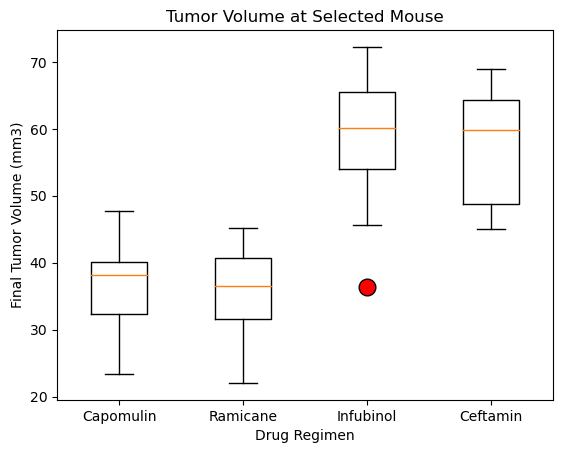

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume at Selected Mouse')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
flierprops = dict(markerfacecolor='r', markersize=12)
ax1.boxplot(tumor_vol_list,labels=four_treatments,flierprops=flierprops)
plt.show()


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

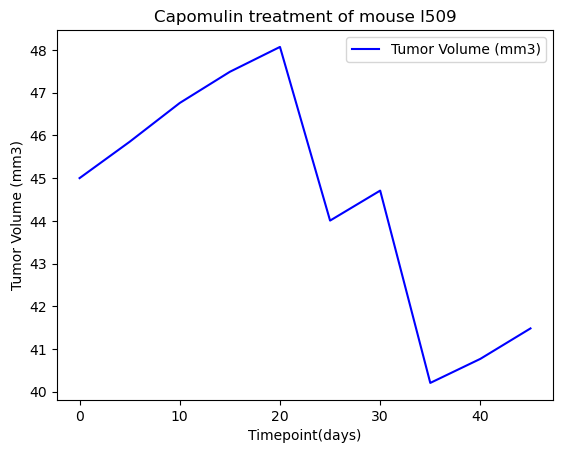

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

Capomulin_data = clean_mice.loc[clean_mice["Drug Regimen"] == "Capomulin",:]
single_mice=Capomulin_data.loc[Capomulin_data['Mouse ID']=="l509",:]
single_mice.plot('Timepoint','Tumor Volume (mm3)', color="blue")
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')

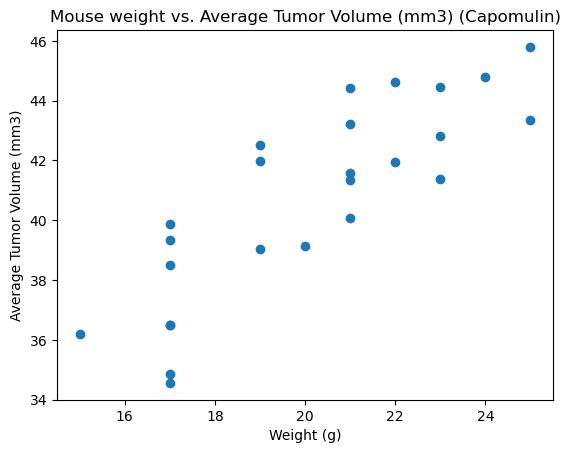

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

x_values = Capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()
y_values = Capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
plt.scatter(x_values,y_values)
plt.title("Mouse weight vs. Average Tumor Volume (mm3) (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


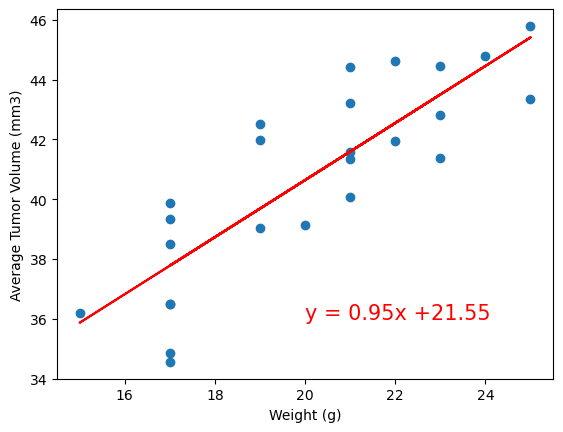

In [18]:
# Calculate the correlation coefficient and a linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
rvalue_print=round(rvalue,2)
print(f"The correlation between mouse weight and the average tumor volume is: {rvalue_print}")
plt.show()